## **<div style="text-align: center"> Analyzing & Visualizing of Netflix Viewing History </div>**

### Reading data

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
print("All necessary packages are imported!")

Data read into a dataframe!


In [2]:
netflix_history = pd.read_csv('ViewingActivity.csv')
netflix_history.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Cansu,2021-01-13 16:03:20,00:23:31,Autoplayed: user action: Unspecified;,Prestij,NaN,Samsung CE 2019 Muse-M UHD TV Smart TV,00:23:25,00:23:25,TR (Turkey)
1,Cansu,2021-01-13 16:01:49,00:00:06,Autoplayed: user action: None;,Wonder Woman_hook_primary_16x9,HOOK,Samsung CE 2019 Muse-M UHD TV Smart TV,00:00:06,00:00:06,TR (Turkey)
2,Cansu,2021-01-13 16:01:31,00:00:08,Autoplayed: user action: None;,The Shawshank Redemption_hook_primary_16x9,HOOK,Samsung CE 2019 Muse-M UHD TV Smart TV,00:00:08,00:00:08,TR (Turkey)
3,Cansu,2021-01-13 16:01:17,00:00:04,Autoplayed: user action: None;,The Truman Show_hook_primary_16x9,HOOK,Samsung CE 2019 Muse-M UHD TV Smart TV,00:00:04,00:00:04,TR (Turkey)
4,Cansu,2021-01-13 16:00:30,00:00:04,Autoplayed: user action: None;,Lucifer: Season 2_hook_primary_16x9,HOOK,Samsung CE 2019 Muse-M UHD TV Smart TV,00:00:04,00:00:04,TR (Turkey)


In [3]:
netflix_history.shape

(13373, 10)

In [4]:
netflix_history['Profile Name'].unique()

array(['Cansu', 'ABD Şube', 'alper', 'Avcılar Şube', 'Çocuk'],
      dtype=object)

Data we have here, has 13373 rows and 10 columns that includes all family family members usage, since this is a family package account. There are 5 family members listed in 'Profile Name' column-There are Turkish names- My profile is under 'ABD Şube', therefore we will work on the data only on those rows. So, let's get only data related to my usage.

In [5]:
df = netflix_history[netflix_history['Profile Name'] == 'ABD Şube']
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
5,ABD Şube,2021-01-13 05:41:40,00:00:05,Autoplayed: user action: None;,L.A.’s Finest: LA's Finest: Season 1_hook_01_16x9,HOOK,Apple iPhone XS,00:00:05,00:00:05,US (United States)
14,ABD Şube,2021-01-10 19:21:05,00:00:04,Autoplayed: user action: None;,Ninja Assassin_hook_primary_16x9,HOOK,Apple iPhone XS,00:00:04,00:00:04,US (United States)
54,ABD Şube,2021-01-08 07:11:23,00:00:17,Autoplayed: user action: None;,Catch Me If You Can_hook_primary_16x9,HOOK,Samsung 2017 Kant-M UHD TV Smart TV,00:00:17,00:00:17,US (United States)
55,ABD Şube,2021-01-08 06:10:16,01:01:03,Autoplayed: user action: Unspecified;,Köstebek,NaN,Samsung 2017 Kant-M UHD TV Smart TV,02:25:08,02:25:08,US (United States)
56,ABD Şube,2021-01-08 06:10:08,00:00:02,Autoplayed: user action: None;,Criminal Minds: 1. Sezon: Won't Get Fooled Aga...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:00:02,00:00:02,US (United States)


`HOOK` values under 'Supplemental Video Type' column are preview watch types. Netflix show these previews automatically on main screen, and this data is also counted as watch time.
NaN values on this column are the ones we played to watch. So, let's drop those HOOK values.<br>
After that, we will reset indexes using `RangeIndex()` function since it's faster than `reset_index()` function.

In [6]:
df = df.drop(df[df['Supplemental Video Type'] == 'HOOK'].index)
df.index = pd.RangeIndex(len(df.index)) # Resetting index numbers after selected rows
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,ABD Şube,2021-01-08 06:10:16,01:01:03,Autoplayed: user action: Unspecified;,Köstebek,NaN,Samsung 2017 Kant-M UHD TV Smart TV,02:25:08,02:25:08,US (United States)
1,ABD Şube,2021-01-08 06:10:08,00:00:02,Autoplayed: user action: None;,Criminal Minds: 1. Sezon: Won't Get Fooled Aga...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:00:02,00:00:02,US (United States)
2,ABD Şube,2021-01-08 06:09:10,00:00:18,NaN,Criminal Minds: 1. Sezon: Compulsion (Bölüm 2),NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:43:57,00:43:57,US (United States)
3,ABD Şube,2021-01-08 06:08:56,00:00:01,Autoplayed: user action: None;,Criminal Minds: 1. Sezon: Extreme Aggressor (B...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:00:01,00:00:01,US (United States)
4,ABD Şube,2021-01-08 06:08:49,00:00:03,Autoplayed: user action: None;,Criminal Minds: 1. Sezon: Extreme Aggressor (B...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:00:03,Not latest view,US (United States)


There are some columns we won't need to use. Let's drop them off by using `drop()` function.

In [7]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
print(df.shape)
df.head()

(3483, 3)


,Start Time,Duration,Title
0,2021-01-08 06:10:16,01:01:03,Köstebek
1,2021-01-08 06:10:08,00:00:02,Criminal Minds: 1. Sezon: Won't Get Fooled Aga...
2,2021-01-08 06:09:10,00:00:18,Criminal Minds: 1. Sezon: Compulsion (Bölüm 2)
3,2021-01-08 06:08:56,00:00:01,Criminal Minds: 1. Sezon: Extreme Aggressor (B...
4,2021-01-08 06:08:49,00:00:03,Criminal Minds: 1. Sezon: Extreme Aggressor (B...


In [8]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

`Start Time` and `Duration` columns stored as a object, which means they are strings. We need to change these two columns into correct datatypes. <br>

-    First, we will use `to_datetime()` function to convert values in `Start Time` column
-    For `Duration` column, we will use `to_timedelta()` function.
-    Lastly, for an accurate data, we can change the time zone in Start time column. Time stored as UTC time zone. We will use `tz_convert()` <br>
     function. This function works only on `DatetimeIndex`, therefore we will set `Start Time` column as an index, convert it and then reset  <br> 
     the index


In [9]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [10]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [11]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Pacific')
df = df.reset_index()

In [12]:
df.dtypes

Start Time    datetime64[ns, US/Pacific]
Duration                 timedelta64[ns]
Title                             object
dtype: object

Looks good! Now, since we convert our dataframe to `timedelta` values we can remove some values. There are some previews, trailers or some shows that I've watched a sneak peek. <br>
Let's remove rows less than 2 minutes. We will use `total_second()` function for that.

In [13]:
df = df[df['Duration'].dt.total_seconds() > 120]
df.shape

(2441, 3)

For detailed analysis, let's create Year, Month, Day, and Day of the Week columns out of Start Time column. 

In [14]:
df['Year'], df['Month'] = df['Start Time'].dt.year, df['Start Time'].dt.month_name().str[:3]
df['Day'] = df['Start Time'].dt.day
df['Day of the Week'] = df['Start Time'].dt.day_name()
df.head()

,Start Time,Duration,Title,Year,Month,Day,Day of the Week
0,2021-01-07 22:10:16-08:00,0 days 01:01:03,Köstebek,2021,Jan,7,Thursday
6,2021-01-03 11:12:49-08:00,0 days 00:54:03,Köstebek,2021,Jan,3,Sunday
8,2020-12-28 16:23:08-08:00,0 days 01:27:23,Kayıp Şeylerin Bakım Kılavuzu,2020,Dec,28,Monday
14,2020-12-28 12:23:35-08:00,0 days 00:07:32,İri Kıyım: Son İnfazcı,2020,Dec,28,Monday
15,2020-12-28 12:12:13-08:00,0 days 00:09:09,Between Two Ferns: The Movie,2020,Dec,28,Monday


NEtflix listed series and movies in same column. Series' seasons and episodes seperated with `:` punctuation. We will seperated their season and episodes and put them in create `Season` and `Episode` column. We will use `split()` function and pass it three arguments. 

In [15]:
title_substr = df.Title.str.split(":",expand=True,n=2)
df['Show'] = title_substr[0]
df['Season'] = title_substr[1]
df['Episode'] = title_substr[2]
df.head()

,Start Time,Duration,Title,Year,Month,Day,Day of the Week,Show,Season,Episode
0,2021-01-07 22:10:16-08:00,0 days 01:01:03,Köstebek,2021,Jan,7,Thursday,Köstebek,None,None
6,2021-01-03 11:12:49-08:00,0 days 00:54:03,Köstebek,2021,Jan,3,Sunday,Köstebek,None,None
8,2020-12-28 16:23:08-08:00,0 days 01:27:23,Kayıp Şeylerin Bakım Kılavuzu,2020,Dec,28,Monday,Kayıp Şeylerin Bakım Kılavuzu,None,None
14,2020-12-28 12:23:35-08:00,0 days 00:07:32,İri Kıyım: Son İnfazcı,2020,Dec,28,Monday,İri Kıyım,Son İnfazcı,None
15,2020-12-28 12:12:13-08:00,0 days 00:09:09,Between Two Ferns: The Movie,2020,Dec,28,Monday,Between Two Ferns,The Movie,None


When we split series some movies also appeared in Season column. It's because some movies was subtitled like the movie Lord of the Rings: Two Towes. To determine, if an entry movie or series, we will create Type column and use apply function and pass lambda as its argument. If the Episode column is null we assign the show as a movie.

In [16]:
df['Type'] = df.apply(lambda x:'Movie' if pd.isnull(x['Episode']) else 'TV Show' , axis=1)
df = df.drop('Title', axis = 1)

Lastly, let's reorder out columns before we get to analyse it.

In [17]:
column_titles = ['Show','Season','Episode','Type', 'Start Time', 'Duration', 'Year', 'Month', 'Day', 'Day of the Week']
df = df[column_titles]
df.head()

,Show,Season,Episode,Type,Start Time,Duration,Year,Month,Day,Day of the Week
0,Köstebek,None,None,Movie,2021-01-07 22:10:16-08:00,0 days 01:01:03,2021,Jan,7,Thursday
6,Köstebek,None,None,Movie,2021-01-03 11:12:49-08:00,0 days 00:54:03,2021,Jan,3,Sunday
8,Kayıp Şeylerin Bakım Kılavuzu,None,None,Movie,2020-12-28 16:23:08-08:00,0 days 01:27:23,2020,Dec,28,Monday
14,İri Kıyım,Son İnfazcı,None,Movie,2020-12-28 12:23:35-08:00,0 days 00:07:32,2020,Dec,28,Monday
15,Between Two Ferns,The Movie,None,Movie,2020-12-28 12:12:13-08:00,0 days 00:09:09,2020,Dec,28,Monday


### Analyzing the Data

Let's move into data visualization and exploritory data analysis(EDA).
We would like to find out how much time was spended in each show. We will show this for movies and tv show separetly. So, let's make seperate dataframe for tv show and movies.

In [19]:
df_tvshow = df.loc[df['Type'] == 'TV Show']
df_tvshow.index = pd.RangeIndex(len(df_tvshow.index)) 
df_tvshow.head()

,Show,Season,Episode,Type,Start Time,Duration,Year,Month,Day,Day of the Week
0,The Office (U.S.),9. Sezon,Finale (Bölüm 23),TV Show,2020-12-23 14:21:18-08:00,0 days 00:50:34,2020,Dec,23,Wednesday
1,The Office (U.S.),9. Sezon,A.A.R.M (Bölüm 22),TV Show,2020-12-23 13:38:35-08:00,0 days 00:42:41,2020,Dec,23,Wednesday
2,The Office (U.S.),9. Sezon,Livin' the Dream (Bölüm 21),TV Show,2020-12-23 12:59:01-08:00,0 days 00:39:27,2020,Dec,23,Wednesday
3,The Office (U.S.),9. Sezon,New Guys (Bölüm 1),TV Show,2020-12-23 12:50:48-08:00,0 days 00:06:48,2020,Dec,23,Wednesday
4,The Office (U.S.),8. Sezon,Fundraiser (Bölüm 22),TV Show,2020-12-23 12:43:24-08:00,0 days 00:06:59,2020,Dec,23,Wednesday


In [20]:
df_movie = df.loc[df['Type'] == 'Movie']
df_movie.index = pd.RangeIndex(len(df_movie.index)) 
df_movie.head()

,Show,Season,Episode,Type,Start Time,Duration,Year,Month,Day,Day of the Week
0,Köstebek,None,None,Movie,2021-01-07 22:10:16-08:00,0 days 01:01:03,2021,Jan,7,Thursday
1,Köstebek,None,None,Movie,2021-01-03 11:12:49-08:00,0 days 00:54:03,2021,Jan,3,Sunday
2,Kayıp Şeylerin Bakım Kılavuzu,None,None,Movie,2020-12-28 16:23:08-08:00,0 days 01:27:23,2020,Dec,28,Monday
3,İri Kıyım,Son İnfazcı,None,Movie,2020-12-28 12:23:35-08:00,0 days 00:07:32,2020,Dec,28,Monday
4,Between Two Ferns,The Movie,None,Movie,2020-12-28 12:12:13-08:00,0 days 00:09:09,2020,Dec,28,Monday


Looks good! Now, let's find out total watch time for each show.

In [21]:
times_each_show = df_tvshow.groupby('Show').Duration.sum().sort_values(ascending = False)[:10]
times_each_show

Show
The Office (U.S.)    9 days 10:28:33
Longmire             4 days 10:54:52
Mad Men              3 days 02:25:08
Person of Interest   2 days 23:23:22
Dexter               1 days 23:15:25
Breaking Bad         1 days 13:18:01
Avatar               1 days 09:53:05
Narcos               0 days 18:59:27
The Queen's Gambit   0 days 12:10:44
After Life           0 days 11:45:05
Name: Duration, dtype: timedelta64[ns]

times_each_show variable is timedelta datatype. To find out in hours, we convert it with astype() function with timedelta[h] argument. 

In [22]:
show_hour = times_each_show.astype('timedelta64[h]')
show_hour

Show
The Office (U.S.)     226.0
Longmire              106.0
Mad Men                74.0
Person of Interest     71.0
Dexter                 47.0
Breaking Bad           37.0
Avatar                 33.0
Narcos                 18.0
The Queen's Gambit     12.0
After Life             11.0
Name: Duration, dtype: float64

Pointing out here that just simply sorting movie or show with sort_values() and value_counts() function will not give us desired outcome. We have to sort "Show" column by total duration of each movie or show. Therefore, below approach applied. 

In [23]:
df_show_grouped = df_tvshow.groupby(['Show'])['Duration'].sum().reset_index(name='Total Time').sort_values(['Total Time'], ascending=False)
xaxis_show = df_show_grouped['Show'][:10].tolist() # getting first ten rows as list instead of pd.dataframe
xaxis_show

['The Office (U.S.)',
 'Longmire',
 'Mad Men',
 'Person of Interest',
 'Dexter',
 'Breaking Bad',
 'Avatar',
 'Narcos',
 "The Queen's Gambit",
 'After Life']

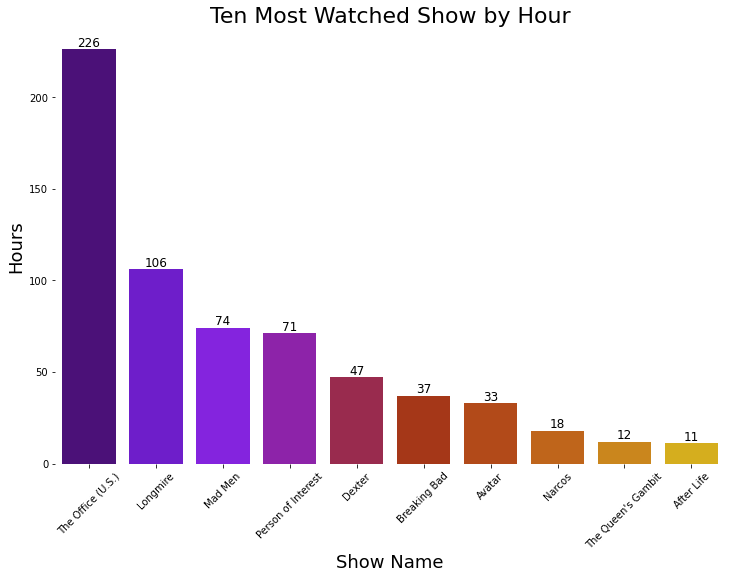

In [24]:
fig = plt.figure(figsize=(12,8))
plt.subplot()
ax = sns.barplot(x = xaxis_show, 
                 y = show_hour,
                 palette="gnuplot")
for i, val in enumerate(show_hour):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Ten Most Watched Show by Hour", fontsize=22)
plt.xlabel("Show Name", fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.savefig('Ten_most_watched_shows.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Preparing the data for x axis
df_movie_grouped = df_movie.groupby(['Show'])['Duration'].sum().reset_index(name='Total Time').sort_values(['Total Time'], ascending=False)
xaxis_movie = df_movie_grouped['Show'][:10].tolist() # getting list outcome instead of pd.dataframe

In [26]:
# Preparing the data for y axis
times_each_movie = df_movie.groupby('Show').Duration.sum().sort_values(ascending = False)[:10]
movie_hour = times_each_movie.astype('timedelta64[h]')

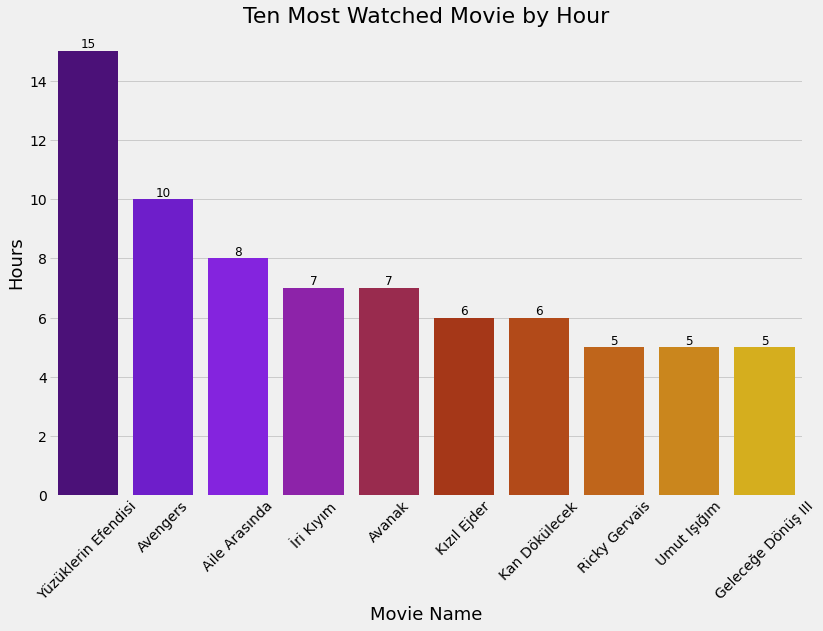

In [27]:
fig = plt.figure(figsize=(12,8))
plt.subplot()
ax = sns.barplot(x = xaxis_movie, 
                 y = movie_hour,
                 palette="gnuplot")
for i, val in enumerate(movie_hour):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Ten Most Watched Movies by Hour", fontsize=22)
plt.xlabel("Movie Name", fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.savefig('Ten_most_watched_movies.png', dpi=300, bbox_inches='tight')
plt.show()

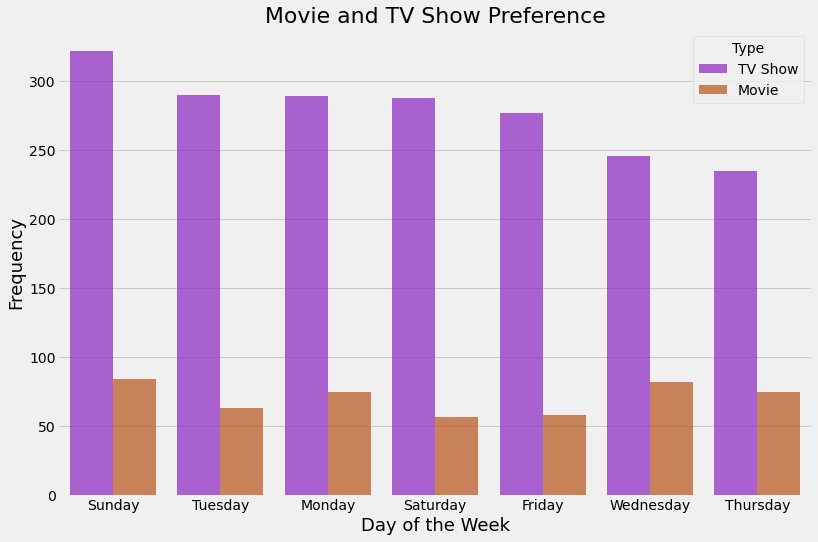

In [28]:
# Finding the freguency based on show type
frequency = df.groupby('Type')['Day of the Week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
# Plotting
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x = frequency["Day of the Week"], 
                 y = frequency["Count"], 
                 hue = frequency["Type"], 
                 palette = "gnuplot",
                 alpha = 0.7)
# Decorizing
plt.title("Movie and TV Show Preference", fontsize=22)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
plt.savefig('Movie_and_TV_Show_Preference.png', dpi=300, bbox_inches='tight')
plt.show()

We will show monthly usage with lineplot. First, let's get the 2020 other years won't cut it. it will give duplicate months

In [29]:
df_type = df['Type'].value_counts().sort_values(ascending=False).reset_index(name='Total')
df_type

,index,Total
0,TV Show,1947
1,Movie,494


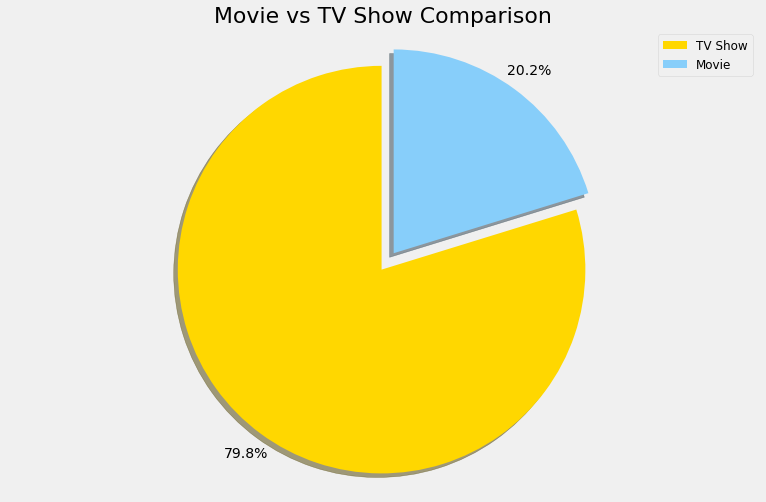

In [30]:
colors_list = ['gold', 'lightskyblue']
explode_list = [0, 0.1] # explode the second slice

df_type['Total'].plot(kind='pie',
                      figsize=(12, 8),
                      autopct='%1.1f%%', 
                      startangle=90, 
                      shadow=True, 
                      labels=None, 
                      pctdistance=1.12, 
                      colors=colors_list, 
                      explode=explode_list, 
                      textprops={'fontsize': 14})

plt.title('Movie vs TV Show Comparison', fontsize=22)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=df_type['index'], loc='upper right', prop={'size': 12})
plt.style.use('fivethirtyeight')
plt.box(False)
plt.savefig('Movie_vs_TV_Show_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
df_2020 = df.loc[df['Year'] == 2020]

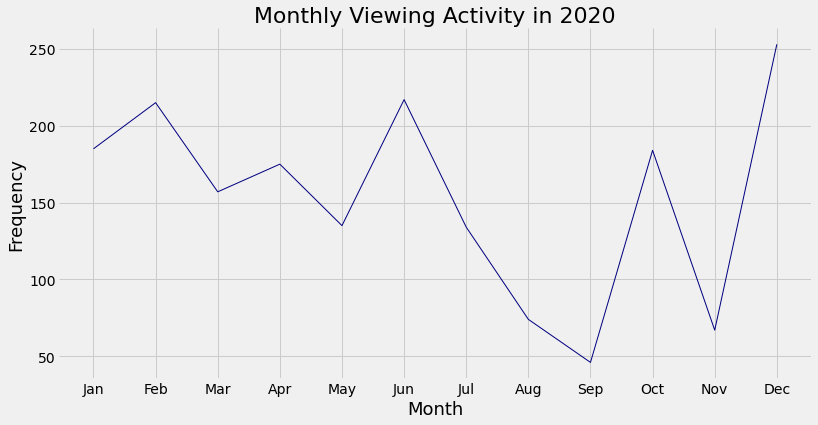

In [32]:
# Getting data ready for x and y axis
xaxis_monthly = df_2020['Month'].reindex(pd.to_datetime(df_2020['Start Time']).dt.month.sort_values().index).unique() # sorting months
yaxis_monthly = df_2020['Month'].reindex(pd.to_datetime(df_2020['Start Time']).dt.month.sort_values().index).value_counts(sort = False)

# Plotting
fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(x = xaxis_monthly, 
                  y = yaxis_monthly,
                  linewidth = 1,
                  color = 'navy')
# Decorizing
plt.style.use('fivethirtyeight')
plt.box(False)
plt.title("Monthly Viewing Activity in 2020", fontsize=22)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.savefig('Monthly_Viewing_Activity_in_2020_line.png', dpi=300, bbox_inches='tight')
plt.show()

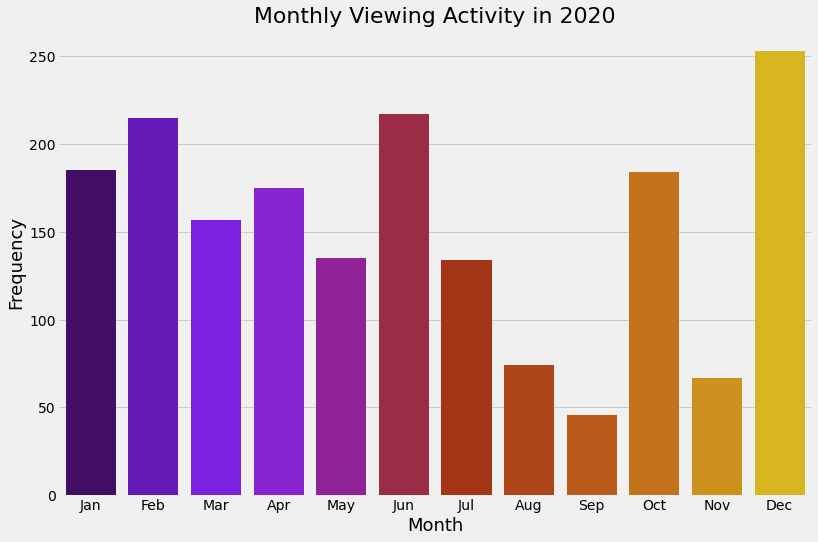

In [33]:
# Getting data ready for x and y axis
xaxis_monthly = df_2020['Month'].reindex(pd.to_datetime(df_2020['Start Time']).dt.month.sort_values().index).unique() # sorting months
yaxis_monthly = df_2020['Month'].reindex(pd.to_datetime(df_2020['Start Time']).dt.month.sort_values().index).value_counts(sort = False)

# Plotting
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x = xaxis_monthly, 
                 y = yaxis_monthly, 
                 palette="gnuplot")
# Decorizing
plt.style.use('fivethirtyeight')
plt.box(False)
plt.title("Monthly Viewing Activity in 2020", fontsize=22)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.savefig('Monthly_Viewing_Activity_in_2020_bar.png', dpi=300, bbox_inches='tight')
plt.show()